# SpaceShip Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

os.chdir('D:\Data analysis\Python\Python_sublessons\Kaggle_competition\SpaceShip_Titanic')
warnings.filterwarnings(action = 'ignore')

In [2]:
# !kaggle competitions download -c spaceship-titanic

## Train Data

In [3]:
train_df = pd.read_csv('./train.csv')

# test_df = pd.read_csv('./test.csv')

train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [4]:
## First get the groups the passengers are traveling with
# Then get the id numbers of all the passengers
# Find out which ids are travelling with what group

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## EDA

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
## Displaying the Total count of NaN values and their percentage 

total = train_df.isnull().sum()

percent = round(100*train_df.isnull().sum()/train_df.isnull().count(),2)

missing_data = pd.concat([total, percent],keys = ['Total', 'Percent']).unstack().T

missing_data

,Total,Percent
PassengerId,0.0,0.00
HomePlanet,201.0,2.31
CryoSleep,217.0,2.50
Cabin,199.0,2.29
Destination,182.0,2.09
Age,179.0,2.06
VIP,203.0,2.34
RoomService,181.0,2.08
FoodCourt,183.0,2.11
ShoppingMall,208.0,2.39


In [12]:
# Here we see that most of the passengers were traveling to the Planet TRAPPIST - 1e

train_df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
# The data is balanced
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

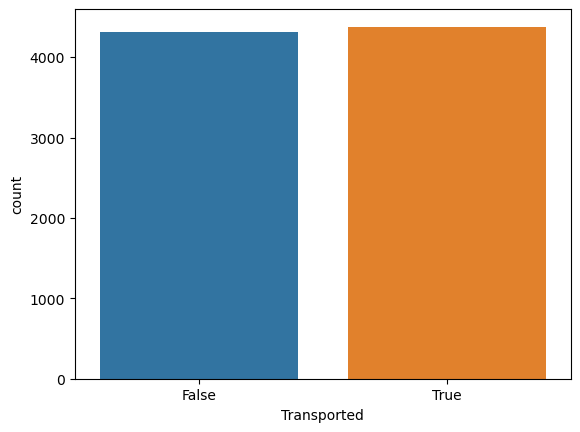

In [14]:
sns.countplot(x = train_df['Transported'])

In [13]:
## The majority of passengers whose name is not indicated were regular passengers 196 and 3 of the passengers were from VIP

In [15]:
train_df[train_df['Name'].isnull()]['VIP'].value_counts()

False    196
True       3
Name: VIP, dtype: int64

In [16]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Dealing with Missing Values

In [17]:
## The majority of VIP passengers were not in a suspended animation during the voyage

train_df[train_df['CryoSleep'] == False]['VIP'].value_counts()

False    5143
True      175
Name: VIP, dtype: int64

In [18]:
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(method = 'ffill')

In [19]:
## The names that are missing will be filled as Unknown

In [20]:
for i, v in enumerate(train_df['Name']):
    if isinstance(v, float):
        train_df['Name'].fillna(value = 'Unknown', inplace=True)

In [22]:
## Function to see the percentage of missing values

In [23]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [25]:
percent_nan = percent_missing(train_df)

percent_nan

Age             2.059128
RoomService     2.082135
Destination     2.093639
FoodCourt       2.105142
Spa             2.105142
VRDeck          2.162660
Cabin           2.289198
HomePlanet      2.312205
VIP             2.335212
ShoppingMall    2.392730
dtype: float64

In [26]:
## Barplot displaying the missing values

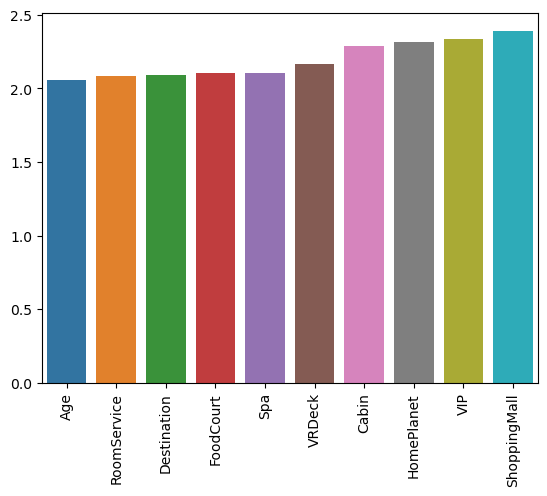

In [27]:
sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90);

In [28]:
## Filling missing values in Age 

train_df['Age'] = train_df['Age'].interpolate(method='linear')

###### Filling missing values in payment columns with geometric mean of the positive values

In [29]:
## Shopping Mall

positive_payment = train_df['ShoppingMall'][train_df['ShoppingMall'] > 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

train_df['ShoppingMall'].fillna(geom_mean, inplace=True)

In [30]:
## VRDeck

positive_payment = train_df['VRDeck'][train_df['VRDeck'] > 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

train_df['VRDeck'].fillna(geom_mean, inplace=True)

In [31]:
## RoomService

positive_payment = train_df['RoomService'][train_df['RoomService'] > 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

train_df['RoomService'].fillna(geom_mean, inplace=True)

In [32]:
## Spa

positive_payment = train_df['Spa'][train_df['Spa'] >= 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

train_df['Spa'].fillna(geom_mean, inplace=True)

In [33]:
## Foodcourt

positive_payment = train_df['FoodCourt'][train_df['FoodCourt'] > 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

train_df['FoodCourt'].fillna(geom_mean, inplace=True)

### Filling missing values in VIP column

In [34]:
train_df['VIP'] = train_df['VIP'].fillna(False)

In [35]:
train_df['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

### Filling missig values in HomePlanet column

In [36]:
train_df['HomePlanet'].fillna(method = 'ffill', inplace=True)

### Filling missig values in Destination column

In [37]:
train_df['Destination'].fillna(method = 'ffill', inplace=True)

### Filling missig values in Cabin column

In [38]:
train_df['Cabin'].fillna(method = 'ffill', inplace=True)

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


<Axes: >

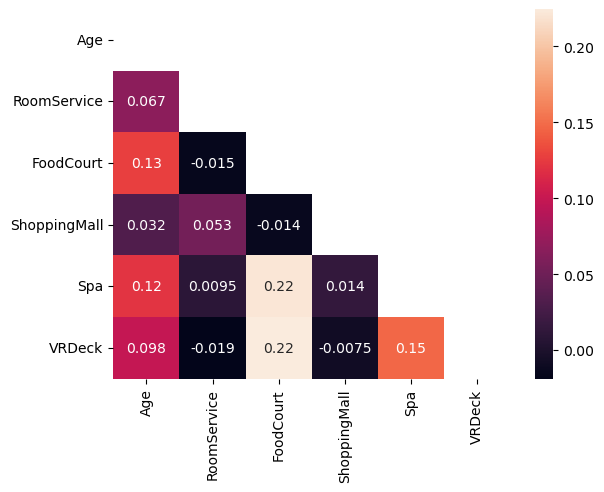

In [40]:
categorical = train_df.select_dtypes(exclude = 'number')

numerical = train_df.select_dtypes(include = 'number')

mask = np.triu(np.ones_like(numerical.corr()))

sns.heatmap(numerical.corr(), annot=True, mask = mask)

### Dealing with categorical Data

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder = LabelEncoder()

In [43]:
categorical = categorical.drop(['PassengerId','Cabin', 'Name'], axis = 1)

In [44]:
for i in train_df[categorical.columns]:
    if isinstance(i, bool):
        train_df[i] = encoder.fit_transform(train_df[i])
    else:
        train_df[i] = encoder.fit_transform(train_df[i])

In [45]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


#### Dealing with Cabin column

In [46]:
train_df[train_df['Cabin'] == 'G/109/P']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
684,0714_01,0,1,G/109/P,1,38.0,0,0.0,0.0,0.000000,0.0,0.0,Erie Rilley,1
685,0714_02,0,0,G/109/P,2,1.0,0,0.0,0.0,0.000000,0.0,0.0,Claine Rilley,0
686,0714_03,0,0,G/109/P,2,12.0,0,0.0,0.0,112.404974,0.0,0.0,Sony Rilley,1
687,0714_04,0,1,G/109/P,1,2.0,0,0.0,0.0,0.000000,0.0,0.0,Charry Rilley,0
688,0714_05,0,1,G/109/P,1,25.0,0,0.0,0.0,0.000000,0.0,0.0,Jeanny Rilley,0
689,0714_06,0,1,G/109/P,0,1.0,0,0.0,0.0,0.000000,0.0,0.0,Man Rilley,1
690,0714_07,0,1,G/109/P,0,0.0,0,0.0,0.0,0.000000,0.0,0.0,Brene Rilley,1
691,0715_01,1,1,G/109/P,0,54.0,0,0.0,0.0,0.000000,0.0,0.0,Izarfik Unconary,1


#### From Cabin column we can extract the side of the ship, the Deck categorization and also the room number

In [47]:
import re

In [48]:
pattern = r'[SP]$'

train_df['Side_of_ship'] = train_df['Cabin'].str.findall(pattern).values

train_df['Side_of_ship'] = train_df['Side_of_ship'].apply(lambda x: x[0])

side_mapping = {'S': 'Starboard', 'P' : 'Port'}

train_df['Side_of_ship'] = train_df['Side_of_ship'].map(side_mapping)

In [49]:
data = [train_df]
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

for dataset in data:
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile(r'([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(np.int64)

(0.0, 1.0)

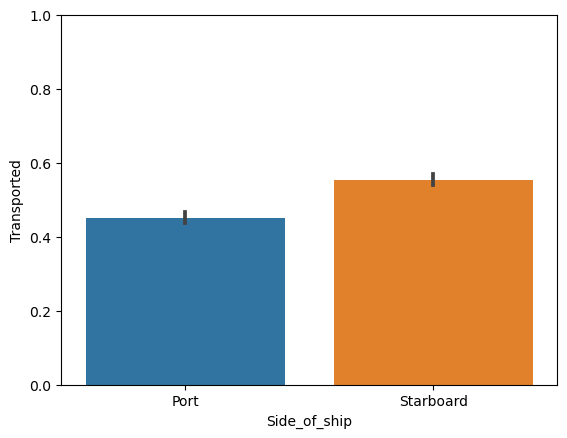

In [50]:
sns.barplot(data=train_df, x = 'Side_of_ship', y = 'Transported')

plt.ylim(0,1)

In [51]:
train_df['Side_of_ship'].value_counts()

Starboard    4376
Port         4317
Name: Side_of_ship, dtype: int64

In [52]:
column_to_move = train_df.pop('Side_of_ship')

train_df.insert(3,'Side_of_ship', column_to_move)

In [53]:
column_to_move = train_df.pop('Deck')

train_df.insert(4,'Deck', column_to_move)

In [55]:
train_df['Side_of_ship'] = encoder.fit_transform(train_df['Side_of_ship'])
train_df['Cabin'] = encoder.fit_transform(train_df['Cabin'])

In [56]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Side_of_ship,Deck,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,0,2,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,1,6,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,1,1,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,1,1,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,1,6,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


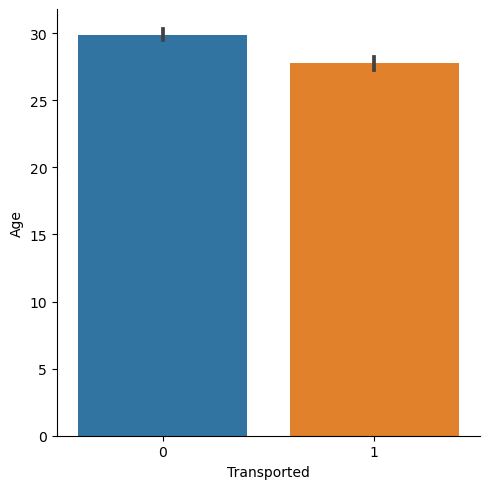

In [57]:
sns.catplot(kind = 'bar', data = train_df, x = 'Transported', y = 'Age')

<Axes: >

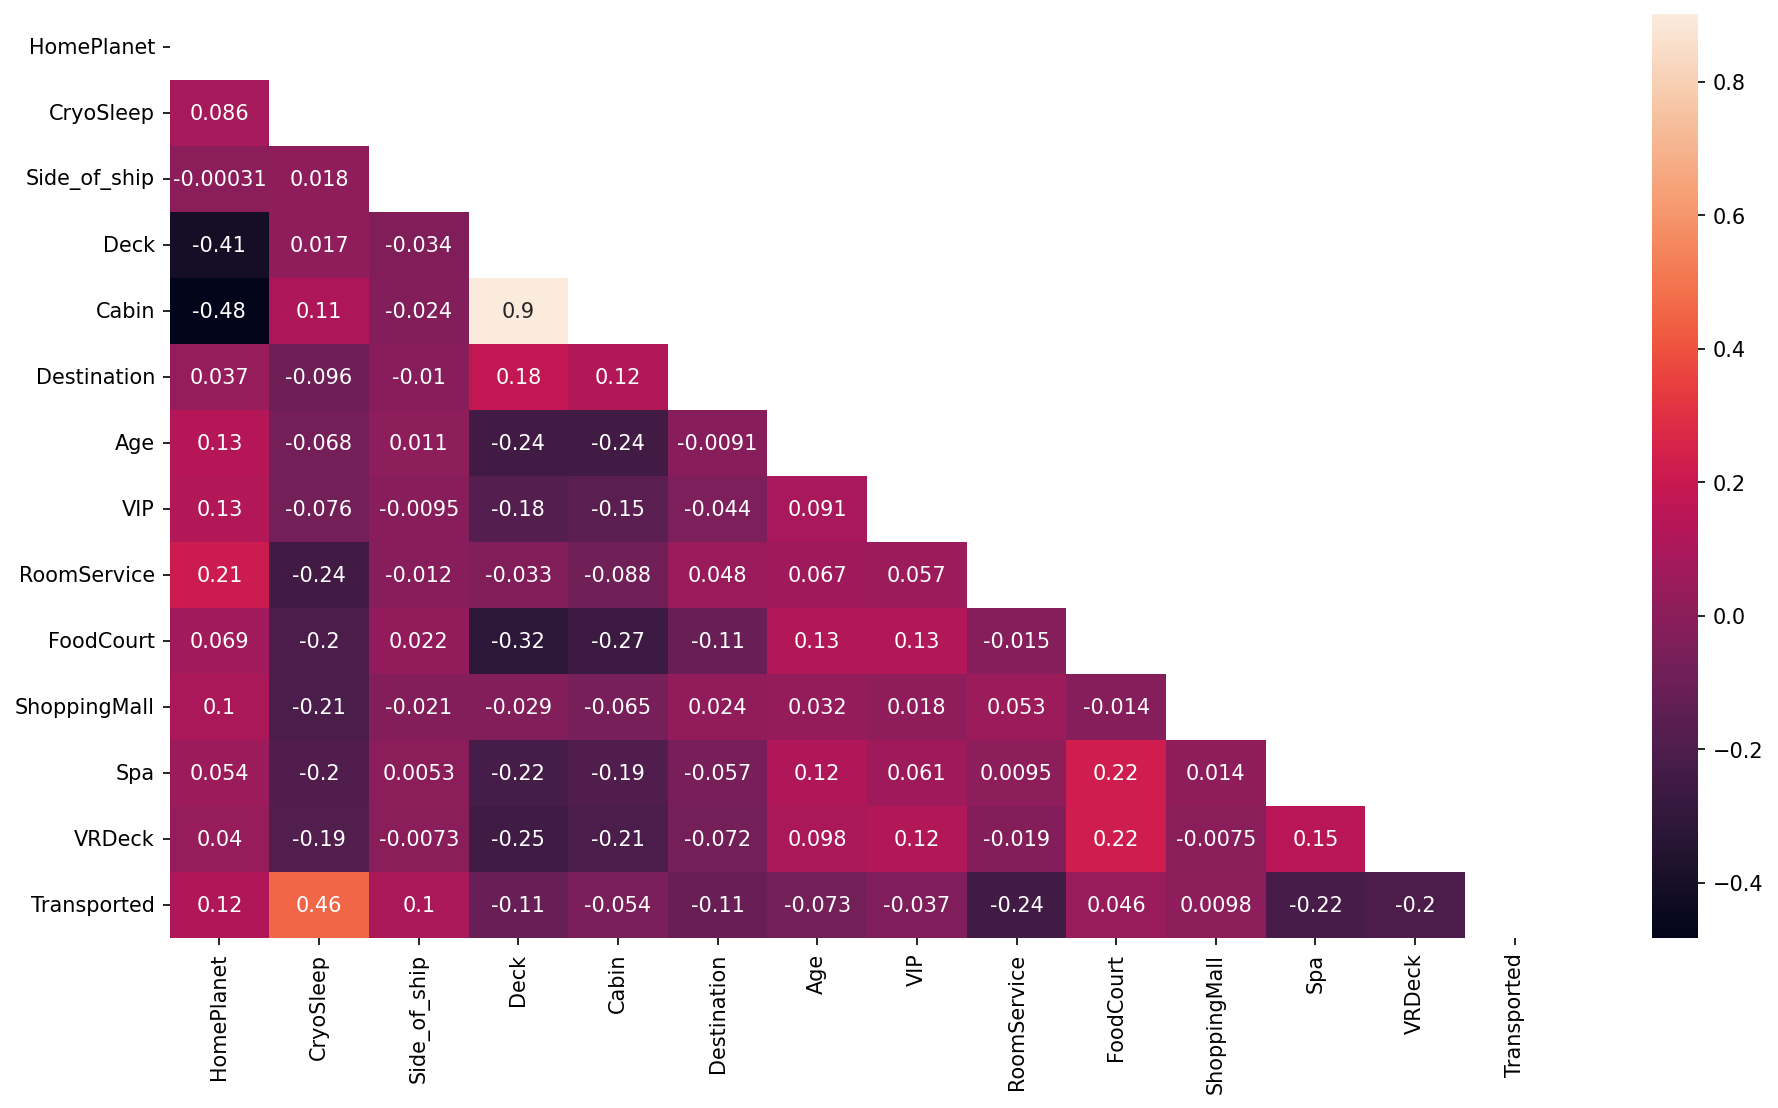

In [58]:
plt.figure(figsize = (15,8), dpi = 150)

categorical = train_df.select_dtypes(exclude = 'number')

numerical = train_df.select_dtypes(include = 'number')

mask = np.triu(np.ones_like(numerical.corr()))

sns.heatmap(numerical.corr(), annot=True, mask = mask)

In [59]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Side_of_ship,Deck,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,0,2,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,1,6,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,1,1,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,1,1,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,1,6,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


### Continue from here
 - ~~Look into Ages column and create an additional column with Ages as bins~~
 - ~~Look into Name column and figure out if there are any families and find out a ratio of families being transported vs singles.~~
 - ~~Look into Multicollinearity~~
 - ~~Check the PassengerId and see which passengers were travelling in one group~~

## Dealing with PassengerId Column

In [60]:
## Getting the first 4 numbers from Passenger ID gggg_pp to identify the groups of passengers

train_df['Groups'] = train_df['PassengerId'].str.extract(r'([0-9]{4})')

## Getting the ids(pp) from gggg_pp to identify their ID numbers

train_df['ID'] = train_df['PassengerId'].str.extract(r'.+(.+[0-9]$)')

## Moving the Column
column_to_move = train_df.pop('Groups')

train_df.insert(0,'Groups', column_to_move)

column_to_move = train_df.pop('ID')

train_df.insert(1,'ID', column_to_move)

In [61]:
## These are the passengers that were travelling with their families

train_df[train_df.groupby('Groups')['ID'].transform('count') > 1]

,Groups,ID,PassengerId,HomePlanet,CryoSleep,Side_of_ship,Deck,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003,01,0003_01,1,0,1,1,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.000000,Altark Susent,0
3,0003,02,0003_02,1,0,1,1,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.000000,Solam Susent,0
6,0006,01,0006_01,0,0,1,6,3425,2,26.0,0,42.0,1539.0,3.0,0.0,0.000000,Billex Jacostaffey,1
7,0006,02,0006_02,0,1,1,7,4559,2,28.0,0,0.0,0.0,0.0,0.0,149.797858,Candra Jacostaffey,1
9,0008,01,0008_01,1,1,0,2,150,0,14.0,0,0.0,0.0,0.0,0.0,0.000000,Erraiam Flatic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,9275,01,9275_01,1,0,0,1,144,2,0.0,0,0.0,0.0,0.0,0.0,0.000000,Polaton Conable,1
8686,9275,02,9275_02,1,0,0,1,144,2,32.0,0,1.0,1146.0,0.0,50.0,34.000000,Diram Conable,0
8687,9275,03,9275_03,1,0,0,1,144,2,30.0,0,0.0,3208.0,0.0,2.0,330.000000,Atlasym Conable,1
8691,9280,01,9280_01,1,0,1,5,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.000000,Celeon Hontichre,0


In [62]:
data = [train_df]

for dataset in data:
    dataset['Family'] = dataset.groupby('Groups')['ID'].transform('count') > 1
    dataset['Family'] = dataset['Family'].apply(lambda x: 1 if x else 0)

In [63]:
column_to_move = train_df.pop('Family')

train_df.insert(6,'Family', column_to_move)

In [64]:
# Age bins
dataset = [train_df]

In [65]:
for data in dataset:
    data['Age'] = data['Age'].astype(np.int64)
    data.loc[data['Age'] <= 11,'Age'] = 0
    data.loc[(data['Age'] > 11) & (data['Age'] <= 18),'Age'] = 1
    data.loc[(data['Age'] > 18) & (data['Age'] <= 22),'Age'] = 2
    data.loc[(data['Age'] > 22) & (data['Age'] <= 27),'Age'] = 3
    data.loc[(data['Age'] > 27) & (data['Age'] <= 33),'Age'] = 4
    data.loc[(data['Age'] > 33) & (data['Age'] <= 40),'Age'] = 5
    data.loc[(data['Age'] > 40) & (data['Age'] <= 66),'Age'] = 6
    data.loc[data['Age'] > 66,'Age'] =  7

In [66]:
## To look for Mr, Mrs, etc in the full name dataset

# train_df['Name'].str.contains('Mr', case=False)

<Axes: xlabel='Transported', ylabel='CryoSleep'>

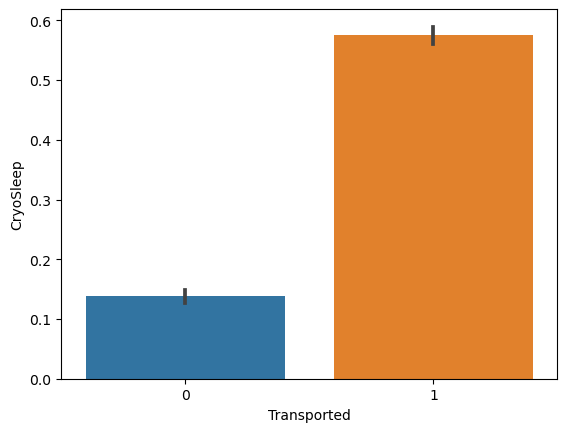

In [67]:
sns.barplot(data = train_df, x = 'Transported', y = 'CryoSleep')

In [70]:
# The majority of the passengers were from the Planet # 0 (Earth)

train_df[train_df['CryoSleep'] == 0]['HomePlanet'].value_counts()

0    3264
1    1218
2    1100
Name: HomePlanet, dtype: int64

In [72]:
train_df.head()

,Groups,ID,PassengerId,HomePlanet,CryoSleep,Side_of_ship,Family,Deck,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001,01,0001_01,1,0,0,0,2,149,2,5,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002,01,0002_01,0,0,1,0,6,2184,2,3,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003,01,0003_01,1,0,1,1,1,1,2,6,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003,02,0003_02,1,0,1,1,1,1,2,4,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004,01,0004_01,0,0,1,0,6,2186,2,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


### Building a Model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score

In [74]:
X = train_df.drop(['PassengerId','Name', 'Transported'], axis = 1)

y = train_df['Transported']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
rf_model = RandomForestClassifier()

In [77]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred = rf_model.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.8096607245543416

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       877
           1       0.82      0.79      0.80       862

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [81]:
param_grid = {'n_estimators':[100,400],
             'criterion':['gini', 'entropy']
             }

grid_model = GridSearchCV(estimator=rf_model, param_grid=param_grid)

grid_model.fit(X_train ,y_train)

y_pred = grid_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       877
           1       0.82      0.80      0.81       862

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [82]:
accuracy_score(y_test, y_pred)

0.8136860264519838

In [83]:
grid_model.best_params_

{'criterion': 'gini', 'n_estimators': 400}

## Test data

In [99]:
test_df = pd.read_csv('./test.csv')

In [100]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [101]:
percent_nan = percent_missing(test_df)

percent_nan

VRDeck          1.870470
RoomService     1.917232
HomePlanet      2.034136
Age             2.127660
Destination     2.151040
CryoSleep       2.174421
VIP             2.174421
Name            2.197802
ShoppingMall    2.291326
Cabin           2.338087
Spa             2.361468
FoodCourt       2.478373
dtype: float64

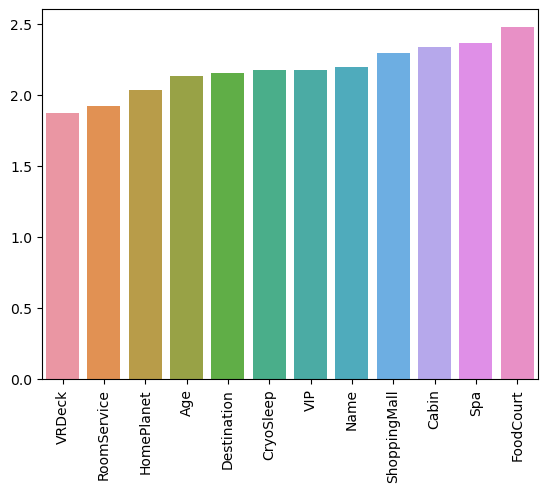

In [102]:
sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90);

#### Dealing with Missing test data

In [103]:
test_df['Age'] = test_df['Age'].interpolate(method='linear')

## Shopping Mall

positive_payment = test_df['ShoppingMall'][test_df['ShoppingMall'] > 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

test_df['ShoppingMall'].fillna(geom_mean, inplace=True)

## VRDeck

positive_payment = test_df['VRDeck'][test_df['VRDeck'] > 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

test_df['VRDeck'].fillna(geom_mean, inplace=True)

## RoomService

positive_payment = test_df['RoomService'][test_df['RoomService'] > 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

test_df['RoomService'].fillna(geom_mean, inplace=True)

## Spa

positive_payment = test_df['Spa'][test_df['Spa'] >= 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

test_df['Spa'].fillna(geom_mean, inplace=True)

## Foodcourt

positive_payment = test_df['FoodCourt'][test_df['FoodCourt'] > 0]

geom_mean = np.exp(np.mean(np.log(positive_payment)))

test_df['FoodCourt'].fillna(geom_mean, inplace=True)

## VIP column

test_df['VIP'] = test_df['VIP'].fillna(False)

## HomePlanet

test_df['HomePlanet'].fillna(method = 'ffill', inplace=True)

# Destination
test_df['Destination'].fillna(method = 'ffill', inplace=True)

# Cabin
test_df['Cabin'].fillna(method = 'ffill', inplace=True)

## CryoSleep
test_df['CryoSleep'] =test_df['CryoSleep'].fillna(method = 'ffill')

for i, v in enumerate(test_df['Name']):
    if isinstance(v, float):
        test_df['Name'].fillna(value = 'Unknown', inplace=True)

In [104]:
## Getting the first 4 number from Passenger ID gggg_pp

test_df['Groups'] = test_df['PassengerId'].str.extract(r'([0-9]{4})')

## Getting the ids(pp) from gggg_pp 

test_df['ID'] = test_df['PassengerId'].str.extract(r'.+(.+[0-9]$)')

## Moving the Column
column_to_move = test_df.pop('Groups')

test_df.insert(0,'Groups', column_to_move)

column_to_move = test_df.pop('ID')

test_df.insert(1,'ID', column_to_move)

In [105]:
data = [test_df]

for dataset in data:
    dataset['Family'] = dataset.groupby('Groups')['ID'].transform('count') > 1
    dataset['Family'] = dataset['Family'].apply(lambda x: 1 if x else 0)

In [106]:
column_to_move = test_df.pop('Family')

test_df.insert(6,'Family', column_to_move)

In [107]:
pattern = r'[SP]$'

test_df['Side_of_ship'] = test_df['Cabin'].str.findall(pattern).values

test_df['Side_of_ship'] = test_df['Side_of_ship'].apply(lambda x: x[0])

side_mapping = {'S': 'Starboard', 'P' : 'Port'}

test_df['Side_of_ship'] = test_df['Side_of_ship'].map(side_mapping)

In [108]:
data = [test_df]
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

for dataset in data:
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile(r'([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(np.int64)
    
column_to_move = test_df.pop('Side_of_ship')

test_df.insert(3,'Side_of_ship', column_to_move)


column_to_move = test_df.pop('Deck')

test_df.insert(4,'Deck', column_to_move)

test_df['Side_of_ship'] = encoder.fit_transform(test_df['Side_of_ship'])
test_df['Cabin'] = encoder.fit_transform(test_df['Cabin'])


In [109]:
cat_cols = test_df.select_dtypes(include = object)

cat_cols = cat_cols.drop(['PassengerId', 'Name', 'Groups', 'ID'], axis = 1)

In [110]:
for i in test_df[cat_cols.columns]:
        test_df[i] = encoder.fit_transform(test_df[i])

In [111]:
test_df['CryoSleep'] = encoder.fit_transform(test_df['CryoSleep'])

test_df['VIP'] = encoder.fit_transform(test_df['VIP'])

In [112]:
dataset = [test_df]

for data in dataset:
    data['Age'] = data['Age'].astype(np.int64)
    data.loc[data['Age'] <= 11,'Age'] = 0
    data.loc[(data['Age'] > 11) & (data['Age'] <= 18),'Age'] = 1
    data.loc[(data['Age'] > 18) & (data['Age'] <= 22),'Age'] = 2
    data.loc[(data['Age'] > 22) & (data['Age'] <= 27),'Age'] = 3
    data.loc[(data['Age'] > 27) & (data['Age'] <= 33),'Age'] = 4
    data.loc[(data['Age'] > 33) & (data['Age'] <= 40),'Age'] = 5
    data.loc[(data['Age'] > 40) & (data['Age'] <= 66),'Age'] = 6
    data.loc[data['Age'] > 66,'Age'] =  7

In [113]:
test_df.head()

,Groups,ID,PassengerId,Side_of_ship,Deck,HomePlanet,CryoSleep,Cabin,Family,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013,01,0013_01,1,7,0,1,2784,0,2,3,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018,01,0018_01,1,6,0,0,1867,0,2,2,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019,01,0019_01,1,3,1,1,257,0,0,4,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021,01,0021_01,1,3,1,0,259,0,2,5,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023,01,0023_01,1,6,0,0,1940,0,2,2,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [114]:
X_train = train_df.drop(['Transported'], axis = 1)

y_train = train_df['Transported']

In [115]:
combined_df = pd.concat([X_train, test_df])

In [116]:
X_train_combined = combined_df.iloc[:len(X_train)].drop(['PassengerId', 'Name'],axis = 1)

X_test_combined = combined_df.iloc[len(X_train):].drop(['PassengerId', 'Name'],axis = 1)

In [117]:
rf_model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [118]:
rf_model.score(X_train_combined, y_train)

0.9998849649142989

In [119]:
y_pred = rf_model.predict(X_test_combined)

In [120]:
mapping = {1:'True', 0:'False'}

In [121]:
final_df = pd.DataFrame(pd.Series(y_pred), columns=['Transported'])

In [122]:
final_df['PassengerId'] = test_df['PassengerId']

In [123]:
column_to_move = final_df.pop('PassengerId')

final_df.insert(0,'PassengerId', column_to_move)

In [124]:
final_df = final_df.set_index('PassengerId')

In [125]:
submission = final_df.replace(mapping)

In [126]:
submission.to_csv('sample_submission_2.csv')

In [127]:
final_df

,Transported
PassengerId,
0013_01,0
0018_01,0
0019_01,1
0021_01,1
0023_01,0
...,...
9266_02,1
9269_01,1
9271_01,1
